In this project we are predicting the winner of a round in the game CSGO. We are using the data from: https://www.kaggle.com/datasets/christianlillelund/csgo-round-winner-classification/

We will be using the machine learning algorthims Logistic regression and SVM using sklearn. 

First We import all neccessary libraries, as well as clean the data. 

In [4]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import seaborn as sns
from sklearn.ensemble import RandomForestClassifier



# Load the dataset
df = pd.read_csv('csgo_round_snapshots.csv')
df.head(3)

,time_left,ct_score,t_score,map,bomb_planted,ct_health,t_health,ct_armor,t_armor,ct_money,...,t_grenade_flashbang,ct_grenade_smokegrenade,t_grenade_smokegrenade,ct_grenade_incendiarygrenade,t_grenade_incendiarygrenade,ct_grenade_molotovgrenade,t_grenade_molotovgrenade,ct_grenade_decoygrenade,t_grenade_decoygrenade,round_winner
0,175.00,0.0,0.0,de_dust2,False,500.0,500.0,0.0,0.0,4000.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,CT
1,156.03,0.0,0.0,de_dust2,False,500.0,500.0,400.0,300.0,600.0,...,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,CT
2,96.03,0.0,0.0,de_dust2,False,391.0,400.0,294.0,200.0,750.0,...,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,CT


Now we split the data, 70/30 and train our logistic regression model. We then can evaluate the model and display our confusion matrix.

Accuracy: 0.75

Classification Report:
              precision    recall  f1-score   support

          CT       0.74      0.75      0.74     12004
           T       0.76      0.74      0.75     12478

    accuracy                           0.75     24482
   macro avg       0.75      0.75      0.75     24482
weighted avg       0.75      0.75      0.75     24482



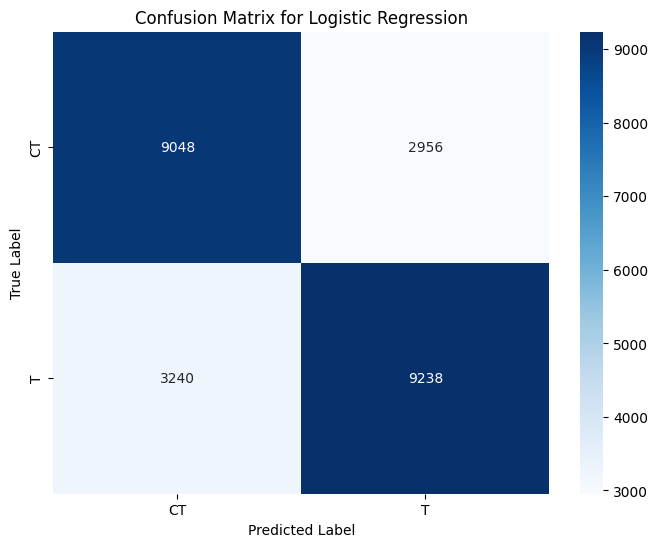

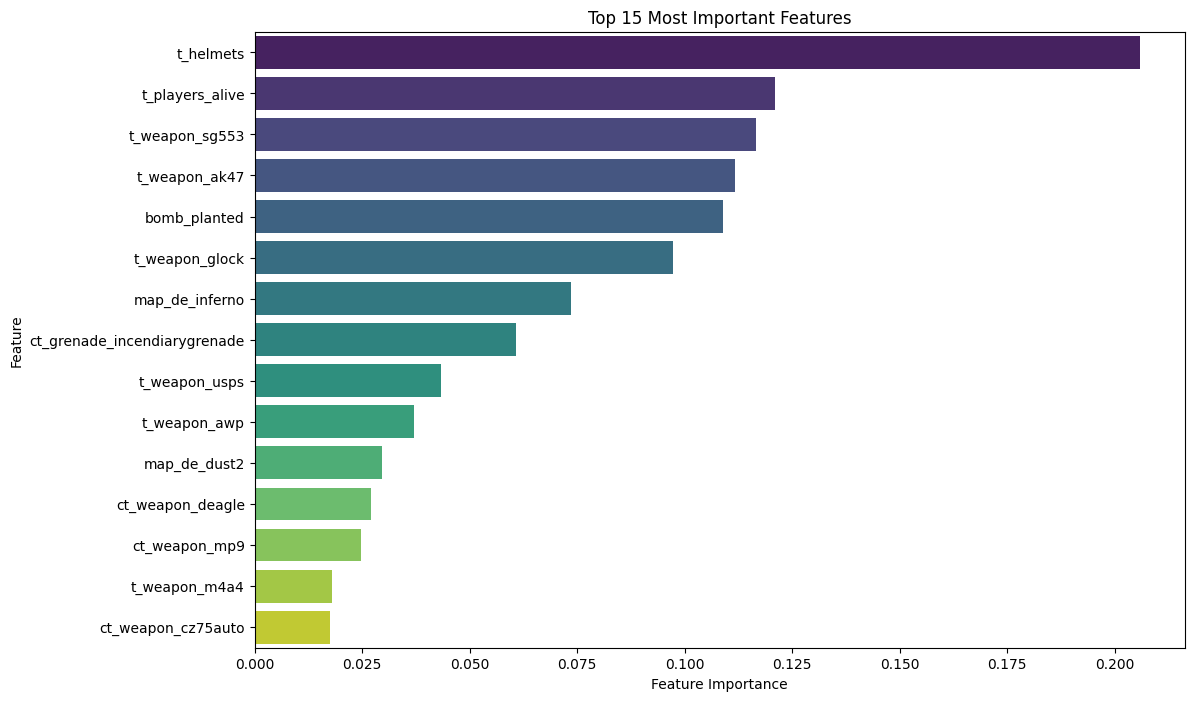

In [5]:
# Preprocess the data
df = pd.get_dummies(df, columns=['map'])

#encode bomb planted
df['bomb_planted'] = df['bomb_planted'].astype(int)

# Define features and target variable
features = df.drop(['round_winner'], axis=1)
target = df['round_winner']

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=42)

# Train the logistic regression model
model = LogisticRegression(max_iter=3000)  # or a higher value
model.fit(X_train, y_train)

# Evaluate the model
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")
# Feature importance
# Feature importance
feature_importance = model.coef_[0]

# Get the indices of the 15 most important features
top_indices = feature_importance.argsort()[-15:][::-1]
# Additional metrics
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

# Create a confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Plot the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=['CT', 'T'], yticklabels=['CT', 'T'])
plt.title('Confusion Matrix for Logistic Regression')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

# Display feature importance in a bar chart for the top 15 features
plt.figure(figsize=(12, 8))
sns.barplot(x=feature_importance[top_indices], y=features.columns[top_indices], hue=features.columns[top_indices], palette="viridis", dodge=False)
plt.title('Top 15 Most Important Features')
plt.xlabel('Feature Importance')
plt.ylabel('Feature')
plt.show()

Now we will implement the Random Forest algorithm.

Accuracy: 0.88

Classification Report:
              precision    recall  f1-score   support

          CT       0.87      0.89      0.88     12004
           T       0.89      0.87      0.88     12478

    accuracy                           0.88     24482
   macro avg       0.88      0.88      0.88     24482
weighted avg       0.88      0.88      0.88     24482



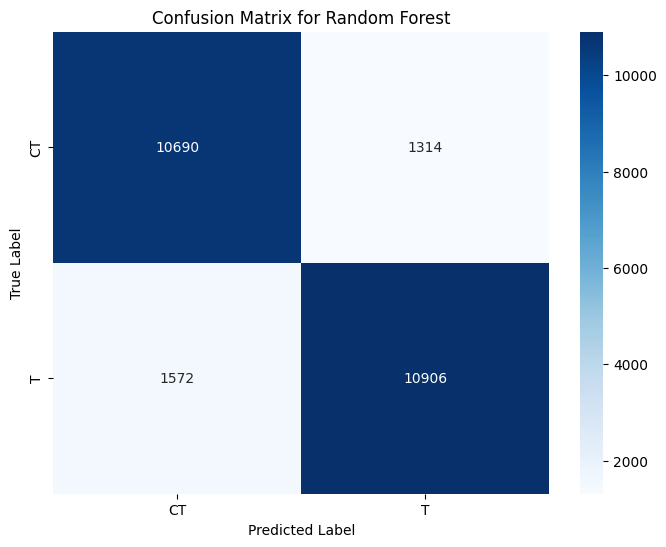

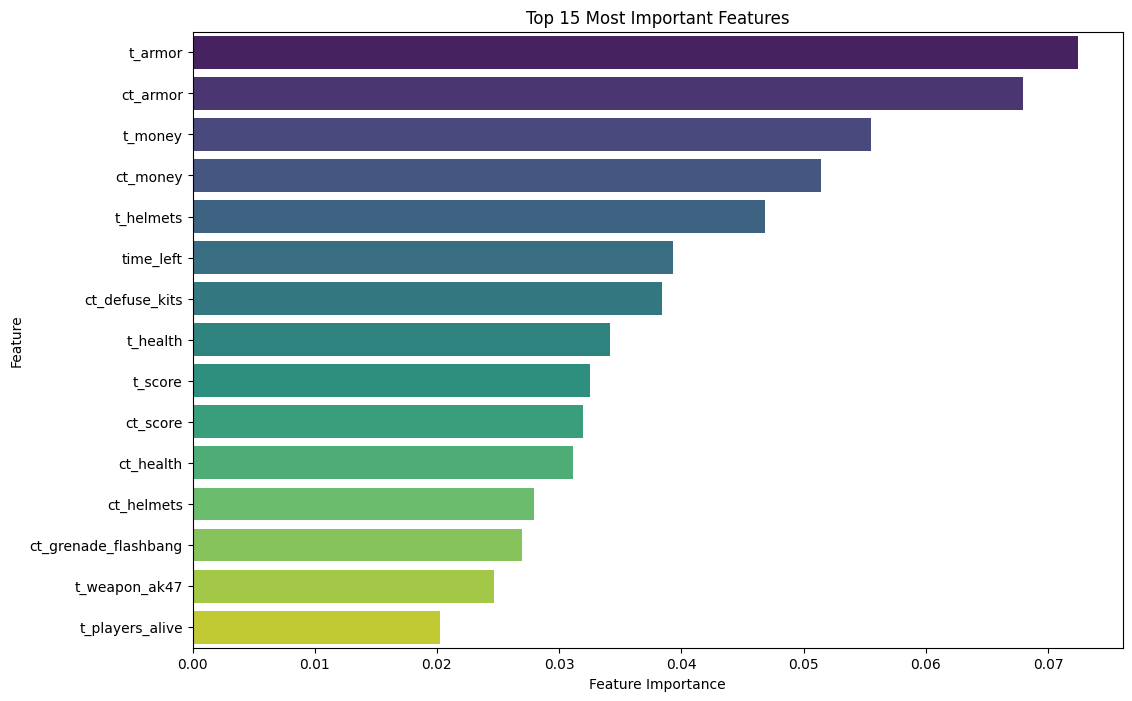

In [6]:
# Train the Random Forest model
model = RandomForestClassifier(n_estimators=100, random_state=42)  # You can adjust hyperparameters as needed
model.fit(X_train, y_train)

# Evaluate the model
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")

# Additional metrics
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

# Create a confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Plot the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=['CT', 'T'], yticklabels=['CT', 'T'])
plt.title('Confusion Matrix for Random Forest')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

# Display feature importance in a bar chart for the top 15 features
feature_importance = model.feature_importances_
top_indices = feature_importance.argsort()[-15:][::-1]


plt.figure(figsize=(12, 8))
sns.barplot(x=feature_importance[top_indices], y=features.columns[top_indices], hue=features.columns[top_indices], palette="viridis", dodge=False)
plt.title('Top 15 Most Important Features')
plt.xlabel('Feature Importance')
plt.ylabel('Feature')
plt.show()